## Install necessary libraries

In [0]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

## Sets a random seed so that the results can be replicated

In [0]:
np.random.seed(7569)

## Load the data
This loads the dataset file into a pandas dataframe. 
Two ancillary columns are removed and the remaining columns have any missing values dropped and then a sample of 5 is displayed



In [0]:
df_train = pd.read_csv('NewDataAdded.csv',encoding = 'unicode_escape')
df_train = df_train.drop(['labelId', 'id'], axis = 1)
df_train.dropna(inplace=True)
df_train = df_train.sort_values('label')
df_train.text = df_train.text.str.lower()
class_names = df_train.label.unique()
df_train.sample(5)

,text,label
298,self-service will do it themselves,Effort
706,fees went up,Value for Money
205,is my speed now,Performance
890,receive a towel or t shirt,Performance
884,stay in shape,Performance


## Create and Display a Plot
The graph shows the distribution of data. It can be seen that the data is highty skewed towards"Enjoyment" and "Informed".

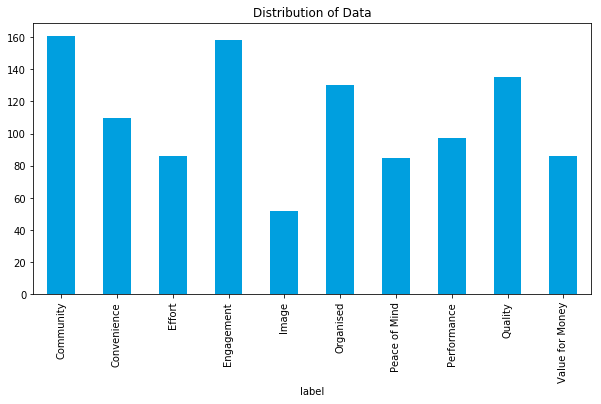

In [0]:
fig = plt.figure(figsize=(10,5))
df_train.groupby('label').text.count().plot.bar(ylim=0, color = '#009fdf', title='Distribution of Data')
plt.show()

# fig.savefig("DisofData.png",bbox_inches='tight')
# files.download("DisofData.png") 

## Create the Training and Testing Data
The below code is used when splitting a single dataset into training and testing

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df_train['text'], df_train['label'],test_size=0.2, random_state = 7569)

# Algorithm Pipeline 
### Below is the pipelines which are used to train and test the algorithms

The pipelines below use a minimum document frequency of 2 and uses unigrams and bigrams for the TFIDF vectorisation

## No Sampling Control

### Naive Nayes No Sampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.24      0.85      0.63      0.38      0.73      0.55        27
    Convenience       0.88      0.54      0.99      0.67      0.73      0.51        26
         Effort       0.83      0.29      1.00      0.43      0.54      0.27        17
     Engagement       0.51      0.59      0.90      0.55      0.73      0.52        32
          Image       1.00      0.12      1.00      0.22      0.35      0.11         8
      Organised       0.60      0.38      0.96      0.46      0.60      0.34        32
  Peace of Mind       0.56      0.36      0.98      0.43      0.59      0.33        14
    Performance       0.57      0.17      0.98      0.27      0.41      0.16        23
        Quality       0.60      0.44      0.96      0.51      0.65      0.40        27
Value for Money       0.80      0.57      0.99      0.67      0.75      0.54        14

    avg / total       0.62      0.47     

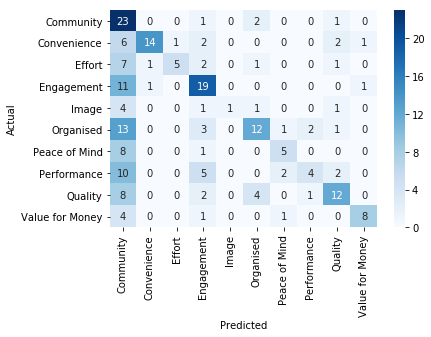

,Text,Predicted Label,Actual Label
520,know what is happening,Organised,Organised
455,someone tells me what to do,Community,Quality
891,would get a medal,Performance,Performance
815,rarely works properly,Quality,Quality
342,a sense of occasion,Community,Community


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                     ngram_range=(1, 2),
                                     stop_words='english'),
                     MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(NoSamp, 
            annot=True,
            fmt='d',
            xticklabels=class_names, 
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleNB.png",bbox_inches='tight')
files.download("NoSampleNB.png")

df_comp_NB_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_NoSam.Text = x_test
df_comp_NB_NoSam['Predicted Label'] = y_pred
df_comp_NB_NoSam['Actual Label'] = y_test
df_comp_NB_NoSam.sample(5)

### Random Forest No Sampling Using TF-IDF

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                       pre       rec       spe        f1       geo       iba       sup

      Community       0.14      0.96      0.20      0.25      0.44      0.21        27
    Convenience       1.00      0.08      1.00      0.14      0.28      0.07        26
         Effort       0.00      0.00      1.00      0.00      0.00      0.00        17
     Engagement       0.55      0.38      0.95      0.44      0.60      0.33        32
          Image       0.00      0.00      1.00      0.00      0.00      0.00         8
      Organised       1.00      0.03      1.00      0.06      0.18      0.03        32
  Peace of Mind       1.00      0.21      1.00      0.35      0.46      0.20        14
    Performance       0.00      0.00      1.00      0.00      0.00      0.00        23
        Quality       1.00      0.15      1.00      0.26      0.38      0.14        27
Value for Money       0.57      0.29      0.99      0.38      0.53      0.26        14

    avg / total       0.58      0.24     

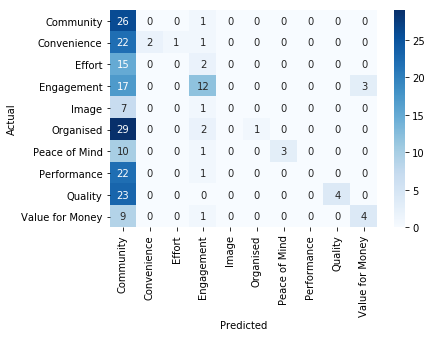

,Text,Predicted Label,Actual Label
455,someone tells me what to do,Community,Quality
686,improve energy levels,Community,Performance
556,the tour was informative,Community,Organised
106,raise more money,Value for Money,Engagement
201,for those who dont have much experience,Community,Performance


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=0.95, min_df=2,
                                       ngram_range=(1, 2),
                                     stop_words='english'),
                     RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()
sns.heatmap(NoSamp,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleRF.png",bbox_inches='tight')
files.download("NoSampleRF.png")

df_comp_RF_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_NoSam.Text = x_test
df_comp_RF_NoSam['Predicted Label'] = y_pred
df_comp_RF_NoSam['Actual Label'] = y_test
df_comp_RF_NoSam.sample(5)

### SVM No Sampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.24      0.70      0.69      0.36      0.70      0.49        27
    Convenience       0.65      0.58      0.96      0.61      0.74      0.53        26
         Effort       0.38      0.35      0.95      0.36      0.58      0.32        17
     Engagement       0.69      0.56      0.96      0.62      0.73      0.52        32
          Image       1.00      0.25      1.00      0.40      0.50      0.23         8
      Organised       0.53      0.31      0.95      0.39      0.55      0.28        32
  Peace of Mind       0.40      0.43      0.96      0.41      0.64      0.39        14
    Performance       0.31      0.17      0.95      0.22      0.41      0.15        23
        Quality       0.60      0.33      0.97      0.43      0.57      0.30        27
Value for Money       0.77      0.71      0.99      0.74      0.84      0.68        14

    avg / total       0.53      0.45     

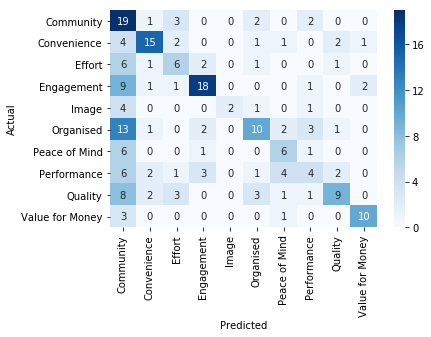

,Text,Predicted Label,Actual Label
854,no reply on,Community,Community
148,let me choose,Convenience,Convenience
447,they know what to do and know what they are doing,Organised,Quality
950,feel-good factor feel good factor,Performance,Peace of Mind
756,will not open properly,Effort,Quality


In [0]:
pipe = make_pipeline(TfidfVectorizer(max_df=.95, min_df=2,
                                       ngram_range=(1, 2),
                                     stop_words='english'),
                     LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

NoSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(NoSamp, 
            annot=True,
            fmt='d',
            xticklabels=class_names, 
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("NoSampleSVM.png",bbox_inches='tight')
files.download("NoSampleSVM.png")

df_comp_SVM_NoSam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_NoSam.Text = x_test
df_comp_SVM_NoSam['Predicted Label'] = y_pred
df_comp_SVM_NoSam['Actual Label'] = y_test
df_comp_SVM_NoSam.sample(5)

## RandomOverSampling 

### Naive Bayes RandomOverSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.24      0.67      0.70      0.35      0.69      0.47        27
    Convenience       0.79      0.58      0.98      0.67      0.75      0.54        26
         Effort       0.39      0.41      0.95      0.40      0.62      0.37        17
     Engagement       0.71      0.47      0.97      0.57      0.67      0.43        32
          Image       0.29      0.25      0.98      0.27      0.49      0.23         8
      Organised       0.62      0.25      0.97      0.36      0.49      0.23        32
  Peace of Mind       0.32      0.43      0.94      0.36      0.63      0.38        14
    Performance       0.33      0.22      0.95      0.26      0.45      0.19        23
        Quality       0.65      0.41      0.97      0.50      0.63      0.37        27
Value for Money       0.62      0.71      0.97      0.67      0.83      0.68        14

    avg / total       0.53      0.44     

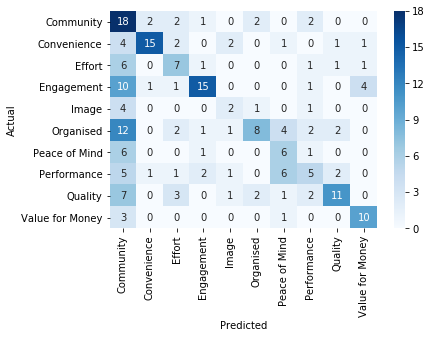

,Text,Predicted Label,Actual Label
688,the price per day is high in comparison.,Value for Money,Value for Money
444,they had no idea whatsoever,Community,Quality
989,consume their time,Engagement,Effort
1026,the notoriety comes with the brand i suppose,Image,Image
342,a sense of occasion,Community,Community


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(ROSSamp, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleNB.png",bbox_inches='tight')
files.download("RandomOverSampleNB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### Random Forest RandomOverSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.50      0.30      0.96      0.37      0.53      0.27        27
    Convenience       0.83      0.58      0.98      0.68      0.75      0.54        26
         Effort       0.50      0.24      0.98      0.32      0.48      0.21        17
     Engagement       0.61      0.44      0.95      0.51      0.65      0.40        32
          Image       1.00      0.38      1.00      0.55      0.61      0.35         8
      Organised       0.67      0.19      0.98      0.29      0.43      0.17        32
  Peace of Mind       0.50      0.29      0.98      0.36      0.53      0.26        14
    Performance       0.50      0.13      0.98      0.21      0.36      0.12        23
        Quality       0.17      0.74      0.49      0.28      0.60      0.37        27
Value for Money       0.73      0.57      0.99      0.64      0.75      0.54        14

    avg / total       0.57      0.39     

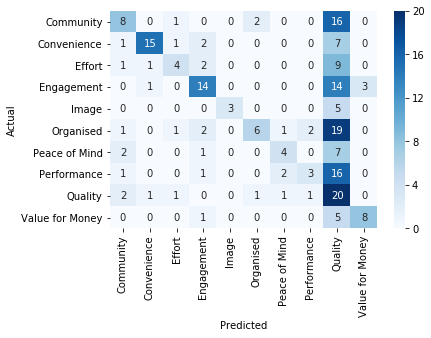

,Text,Predicted Label,Actual Label
949,its unladylike,Quality,Peace of Mind
734,being nosey,Quality,Peace of Mind
35,"the building is accessible, its easy to access",Effort,Convenience
508,mention the event to,Engagement,Organised
801,no barriers in operation,Quality,Quality


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(ROSSamp, 
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleRF.png",bbox_inches='tight')
files.download("RandomOverSampleRF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SVM RandomOverSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.25      0.70      0.70      0.37      0.70      0.49        27
    Convenience       0.69      0.69      0.96      0.69      0.81      0.65        26
         Effort       0.36      0.47      0.93      0.41      0.66      0.42        17
     Engagement       0.78      0.56      0.97      0.65      0.74      0.53        32
          Image       0.25      0.25      0.97      0.25      0.49      0.23         8
      Organised       0.64      0.28      0.97      0.39      0.52      0.25        32
  Peace of Mind       0.43      0.43      0.96      0.43      0.64      0.39        14
    Performance       0.33      0.17      0.96      0.23      0.41      0.15        23
        Quality       0.73      0.30      0.98      0.42      0.54      0.27        27
Value for Money       0.77      0.71      0.99      0.74      0.84      0.68        14

    avg / total       0.56      0.46     

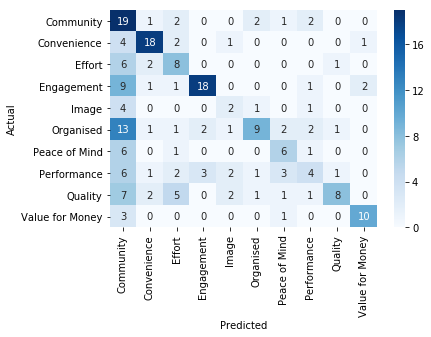

,Text,Predicted Label,Actual Label
137,"larger variation of equipment, wider range of kit",Convenience,Convenience
255,"the natural light, lack of natural light",Community,Image
492,pocket money,Value for Money,Value for Money
665,they have physicality and running power,Engagement,Performance
243,"me, my eldest and middle one all did it my lit...",Peace of Mind,Community


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomOverSampler(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

ROSSamp = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(ROSSamp,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomOverSampleSVM.png",bbox_inches='tight')
files.download("RandomOverSampleSVM.png") 

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)

## SMOTE

### Naive Bayes SMOTE Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.23      0.63      0.70      0.33      0.66      0.44        27
    Convenience       0.73      0.62      0.97      0.67      0.77      0.58        26
         Effort       0.45      0.29      0.97      0.36      0.53      0.27        17
     Engagement       0.57      0.50      0.94      0.53      0.68      0.45        32
          Image       0.29      0.25      0.98      0.27      0.49      0.23         8
      Organised       0.62      0.31      0.97      0.42      0.55      0.28        32
  Peace of Mind       0.35      0.43      0.95      0.39      0.64      0.38        14
    Performance       0.36      0.17      0.96      0.24      0.41      0.15        23
        Quality       0.63      0.44      0.96      0.52      0.65      0.41        27
Value for Money       0.71      0.71      0.98      0.71      0.84      0.68        14

    avg / total       0.52      0.45     

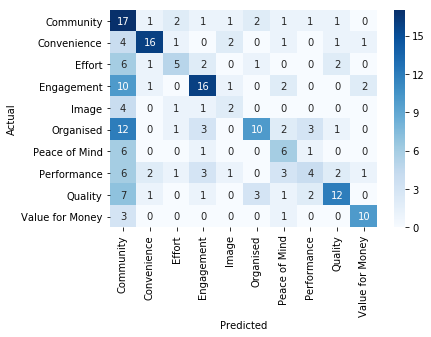

,Text,Predicted Label,Actual Label
808,does not often work,Quality,Quality
41,the class was over capacity and busy.,Convenience,Convenience
860,being well looked after,Community,Community
529,make more advertisements with advert campaign,Effort,Organised
455,someone tells me what to do,Community,Quality


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

SMOTE_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(SMOTE_Mat, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTENB.png",bbox_inches='tight')
files.download("SMOTENB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### Random Forest SMOTE Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.33      0.07      0.98      0.12      0.27      0.07        27
    Convenience       0.67      0.38      0.97      0.49      0.61      0.35        26
         Effort       0.67      0.24      0.99      0.35      0.48      0.22        17
     Engagement       0.55      0.34      0.95      0.42      0.57      0.31        32
          Image       0.33      0.12      0.99      0.18      0.35      0.11         8
      Organised       0.21      0.88      0.43      0.33      0.61      0.39        32
  Peace of Mind       0.55      0.43      0.98      0.48      0.65      0.40        14
    Performance       0.29      0.09      0.97      0.13      0.29      0.08        23
        Quality       0.67      0.15      0.99      0.24      0.38      0.13        27
Value for Money       0.50      0.36      0.98      0.42      0.59      0.33        14

    avg / total       0.47      0.33     

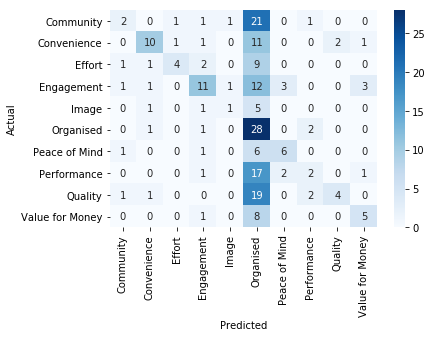

,Text,Predicted Label,Actual Label
284,i found it difficult. it wouldn't let me. this...,Effort,Effort
102,#justsponsored,Organised,Engagement
755,needs to improve a lot.,Performance,Quality
129,everyone who has donated to my page,Organised,Engagement
844,were particularly helpful,Organised,Community


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

SMOTE_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(SMOTE_Mat, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTERF.png",bbox_inches='tight')
files.download("SMOTERF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SVM SMOTE Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.63      0.44      0.96      0.52      0.65      0.41        27
    Convenience       0.64      0.62      0.95      0.63      0.77      0.57        26
         Effort       0.36      0.29      0.96      0.32      0.53      0.26        17
     Engagement       0.75      0.56      0.97      0.64      0.74      0.52        32
          Image       1.00      0.25      1.00      0.40      0.50      0.23         8
      Organised       0.28      0.66      0.72      0.40      0.69      0.47        32
  Peace of Mind       0.33      0.50      0.93      0.40      0.68      0.45        14
    Performance       0.31      0.17      0.95      0.22      0.41      0.15        23
        Quality       0.53      0.30      0.96      0.38      0.53      0.27        27
Value for Money       0.77      0.71      0.99      0.74      0.84      0.68        14

    avg / total       0.54      0.47     

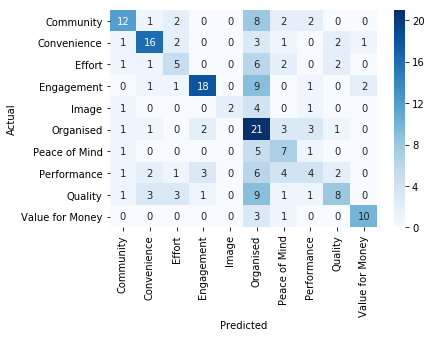

,Text,Predicted Label,Actual Label
205,is my speed now,Organised,Performance
834,they responded quickly and dealt with it well.,Effort,Community
500,i did not know about it. by the time i found o...,Organised,Organised
944,surely the expense isn't worth the result?,Value for Money,Value for Money
1071,my pt has helped me greatly,Organised,Quality


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         BorderlineSMOTE(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

SMOTE_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(SMOTE_Mat, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("SMOTESVM.png",bbox_inches='tight')
files.download("SMOTESVM.png") 

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)

## RandomUnderSampling

### Naive Bayes RandomUnderSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.18      0.48      0.70      0.27      0.58      0.33        27
    Convenience       0.68      0.58      0.96      0.62      0.75      0.53        26
         Effort       0.24      0.29      0.92      0.26      0.52      0.25        17
     Engagement       0.52      0.38      0.94      0.44      0.59      0.33        32
          Image       0.33      0.25      0.98      0.29      0.50      0.23         8
      Organised       0.58      0.22      0.97      0.32      0.46      0.20        32
  Peace of Mind       0.30      0.43      0.93      0.35      0.63      0.38        14
    Performance       0.21      0.17      0.92      0.19      0.40      0.15        23
        Quality       0.58      0.26      0.97      0.36      0.50      0.23        27
Value for Money       0.64      0.64      0.98      0.64      0.79      0.61        14

    avg / total       0.45      0.36     

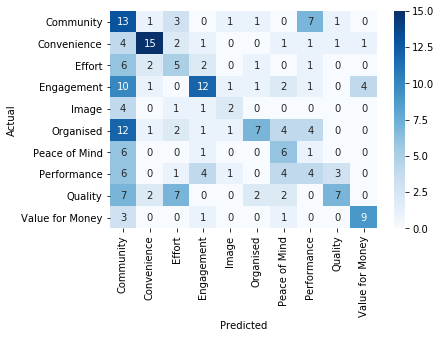

,Text,Predicted Label,Actual Label
944,surely the expense isn't worth the result?,Value for Money,Value for Money
891,would get a medal,Performance,Performance
318,love the buzz,Image,Community
609,i still have one from 1998,Community,Engagement
284,i found it difficult. it wouldn't let me. this...,Performance,Effort


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         MultinomialNB())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(RUS_Mat, 
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleNB.png",bbox_inches='tight')
files.download("RandomUnderSampleNB.png") 

df_comp_NB_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_NB_Sam.Text = x_test
df_comp_NB_Sam['Predicted Label'] = y_pred
df_comp_NB_Sam['Actual Label'] = y_test
df_comp_NB_Sam.sample(5)

### Random Forest RandomUnderSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.23      0.11      0.95      0.15      0.32      0.10        27
    Convenience       0.54      0.50      0.94      0.52      0.69      0.45        26
         Effort       0.25      0.12      0.97      0.16      0.34      0.10        17
     Engagement       0.44      0.34      0.93      0.39      0.56      0.30        32
          Image       0.20      0.12      0.98      0.15      0.35      0.11         8
      Organised       0.62      0.16      0.98      0.25      0.39      0.14        32
  Peace of Mind       0.36      0.29      0.97      0.32      0.53      0.26        14
    Performance       0.11      0.48      0.53      0.17      0.50      0.25        23
        Quality       0.62      0.30      0.97      0.40      0.54      0.27        27
Value for Money       0.70      0.50      0.99      0.58      0.70      0.47        14

    avg / total       0.43      0.30     

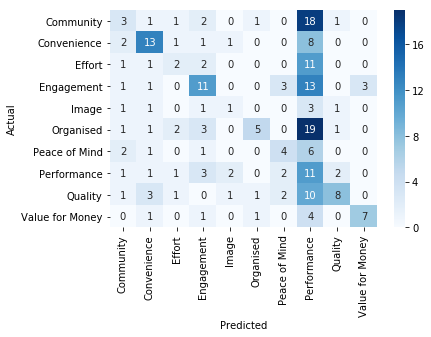

,Text,Predicted Label,Actual Label
295,have to try and find my,Performance,Effort
205,is my speed now,Performance,Performance
693,pay-as-you-go pay as you go,Performance,Value for Money
584,show a video about how the equipment/machines ...,Convenience,Organised
27,lots of available machines. i don't have to wa...,Convenience,Convenience


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         RandomForestClassifier(n_estimators=200, max_depth=5, random_state=7569))

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(RUS_Mat, 
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleRF.png",bbox_inches='tight')
files.download("RandomUnderSampleRF.png") 

df_comp_RF_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_RF_Sam.Text = x_test
df_comp_RF_Sam['Predicted Label'] = y_pred
df_comp_RF_Sam['Actual Label'] = y_test
df_comp_RF_Sam.sample(5)

### SVM RandomUnderSampling Using TF-IDF

                       pre       rec       spe        f1       geo       iba       sup

      Community       0.41      0.26      0.95      0.32      0.50      0.23        27
    Convenience       0.68      0.65      0.96      0.67      0.79      0.61        26
         Effort       0.23      0.29      0.92      0.26      0.52      0.25        17
     Engagement       0.45      0.31      0.94      0.37      0.54      0.27        32
          Image       0.08      0.75      0.68      0.15      0.72      0.52         8
      Organised       0.54      0.22      0.97      0.31      0.46      0.20        32
  Peace of Mind       0.40      0.43      0.96      0.41      0.64      0.39        14
    Performance       0.44      0.17      0.97      0.25      0.41      0.16        23
        Quality       0.67      0.22      0.98      0.33      0.47      0.20        27
Value for Money       0.67      0.71      0.98      0.69      0.83      0.68        14

    avg / total       0.49      0.35     

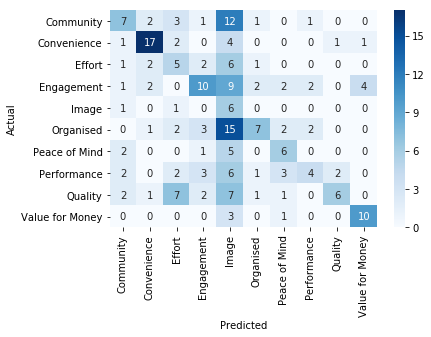

,Text,Predicted Label,Actual Label
182,"clean the place better, make sure the toilets ...",Quality,Quality
204,feeling horribly under-trained,Quality,Performance
734,being nosey,Image,Peace of Mind
1084,more expensive than advertised,Value for Money,Value for Money
386,enjoyed her time,Engagement,Engagement


In [0]:
pipe = make_pipeline_imb(TfidfVectorizer(max_df=0.95, min_df=2,
                                         ngram_range=(1, 2),
                                         stop_words = 'english'),
                         RandomUnderSampler(random_state=7569),
                         LinearSVC())

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

print(classification_report_imbalanced(y_test, y_pred))

RUS_Mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()

sns.heatmap(RUS_Mat,
            annot=True, 
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ax.figure.savefig("RandomUnderSampleSVM.png",bbox_inches='tight')
files.download("RandomUnderSampleSVM.png") 

df_comp_SVM_Sam = pd.DataFrame(columns=['Text','Predicted Label','Actual Label'])
df_comp_SVM_Sam.Text = x_test
df_comp_SVM_Sam['Predicted Label'] = y_pred
df_comp_SVM_Sam['Actual Label'] = y_test
df_comp_SVM_Sam.sample(5)